In [1]:
!pip install PyArrow
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from pyspark.sql.functions import *
from pyspark.sql.types import *
from pyspark import SparkContext, SparkConf
from pyspark.sql import SQLContext, SparkSession

In [2]:
dataset = pd.read_csv("/home/fitec/Documents/Project.csv")

/home/fitec/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
dataset

,Country_code,Country,Format_name,Pollutant_name,Sector_code,Sector_name,Parent_sector_code,Unit,Year,emissions,Notation,PublicationDate,DataSource
0,AT,Austria,IPCC Common Reporting Format,All greenhouse gases - (CO2 equivalent),4.G,4.G - Harvested Wood Products,4,Gg CO2 equivalent,1985,-1692.35733,NaN,20200529,EEA
1,AT,Austria,IPCC Common Reporting Format,All greenhouse gases - (CO2 equivalent),4.G,4.G - Harvested Wood Products,4,Gg CO2 equivalent,1986,-1714.29776,NaN,20200529,EEA
2,AT,Austria,IPCC Common Reporting Format,All greenhouse gases - (CO2 equivalent),4.G,4.G - Harvested Wood Products,4,Gg CO2 equivalent,1987,-1533.60746,NaN,20200529,EEA
3,AT,Austria,IPCC Common Reporting Format,All greenhouse gases - (CO2 equivalent),4.G,4.G - Harvested Wood Products,4,Gg CO2 equivalent,1988,-2467.99920,NaN,20200529,EEA
4,AT,Austria,IPCC Common Reporting Format,All greenhouse gases - (CO2 equivalent),4.G,4.G - Harvested Wood Products,4,Gg CO2 equivalent,1989,-3067.43214,NaN,20200529,EEA
...,...,...,...,...,...,...,...,...,...,...,...,...,...
665910,UK,United Kingdom (Convention),IPCC Common Reporting Format,Unspecified mix of HFCs and PFCs - (CO2 equiva...,Sectors/Totals_excl,Total (without LULUCF),NaN,Gg CO2 equivalent,2018,0.00000,�,20200529,EEA
665911,UK,United Kingdom (Convention),IPCC Common Reporting Format,Unspecified mix of HFCs and PFCs - (CO2 equiva...,2.E.3,2.E.3 - Photovoltaics,2.E,Gg CO2 equivalent,2018,0.00000,NO,20200529,EEA
665912,UK,United Kingdom (Convention),IPCC Common Reporting Format,Unspecified mix of HFCs and PFCs - (CO2 equiva...,Sectors/Totals_excl_incl_avi_nav,"Total (without LULUCF, with international tran...",NaN,Gg CO2 equivalent,2018,0.00000,�,20200529,EEA
665913,UK,United Kingdom (Convention),IPCC Common Reporting Format,Unspecified mix of HFCs and PFCs - (CO2 equiva...,2.E.5,2.E.5 - Other electronics industry,2.E,Gg CO2 equivalent,2018,0.00000,NO,20200529,EEA


In [4]:
dataset = dataset.drop(['Country_code', 'Format_name','Sector_code','Parent_sector_code','Unit','Notation','PublicationDate','DataSource'], axis = 1)

In [5]:
dataset = pd.pivot_table(dataset,index = ['Year','Country','Pollutant_name'], columns = 'Sector_name', values ='emissions').reset_index()
dataset.columns.name =None


In [6]:
dataset.index = dataset['Year']


In [7]:
dataset.drop(['Year','Pollutant_name'], axis = 1)

,Country,- 4(IV) Indirect N2O Emissions from Managed Soils,1 - Energy,1.A.1 - Energy Industries,1.A.1.a - Public Electricity and Heat Production,1.A.1.b - Petroleum Refining,1.A.1.c - Manufacture of Solid Fuels and Other Energy Industries,1.A.2 - Manufacturing Industries and Construction,1.A.2.a - Iron and Steel,1.A.2.b - Non-Ferrous Metals,...,5.E - Other Disposal,5.F.1 - Long-term Storage of C in Waste Disposal Sites,5.F.2 - Annual Change in Total Long-term C Storage,5.F.3 - Annual Change in Total Long-term C Storage in HWP Waste,6 - Other Sector,Total (with LULUCF),Total (without LULUCF),"Total (without LULUCF, with international aviation)","Total (without LULUCF, with international transport)",ind_CO2 - Indirect CO2
Year,,,,,,,,,,,,,,,,,,,,,
1985,Austria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1985,Austria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1985,Romania,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,3551.41629,0.00000,0.00000,0.00000,0.0
1985,Romania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.03258,NaN,NaN,NaN,NaN
1985,Romania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2672.56421,0.00000,0.00000,0.00000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018,Iceland,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,76.44399,76.44399,76.44399,76.44399,NaN
2018,Iceland,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,3.26010,3.26010,3.26010,3.26010,NaN
2018,Iceland,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.00000,0.00000,0.00000,0.00000,NaN


In [8]:
dataset = dataset.drop(['Year','Country','Pollutant_name','1 - Energy','2 - Industrial Processes and Product Use','3 - Agriculture','4 - Land Use, Land-Use Change and Forestry','4.A - Forest Land','4.A Emissions/Removal 4(II)  Emissions and removals from drainage and rewetting and other management of organic and mineral soils','4.A.1 - Forest Land remaining forest land','4.A.2 - Land converted to forest land','4.B - Cropland','4.B Emissions/Removal 4(II)  Emissions and removals from drainage and rewetting and other management of organic and mineral soils','4.B.1 - Cropland remaining cropland','4.B.2 - Land converted to cropland','4.C - Grassland','4.C Emissions/Removal 4(II)  Emissions and removals from drainage and rewetting and other management of organic and mineral soils','4.C.1 - Grassland remaining grassland','4.C.2 - Land converted to grassland','4.D - Wetlands','4.D Emissions/Removal 4(II)  Emissions and removals from drainage and rewetting and other management of organic and mineral soils','4.D.1 - Wetlands remaining wetlands','4.D.2 - Land converted to wetlands','4.E - Settlements','4.E Biomass Burning 4(V) Biomass Burning','4.E.1 - Settlements remaining settlements','4.E.2 - Land converted to settlements','4.F - Other Land','4.F.2 - Land converted to other land','4.F.3 4(III)  Direct N2O Emissions from N Mineralization/Immobilization','4.F.4 4(V)  Biomass Burning','4.G - Harvested Wood Products','4.H - Other LULUCF','5 - Waste management','6 - Other Sector','Total (with LULUCF)','Total (without LULUCF, with international aviation)','Total (without LULUCF, with international transport)'], axis =1)

In [9]:
dataset = dataset.dropna(thresh = 128)

In [10]:
dataset

,- 4(IV) Indirect N2O Emissions from Managed Soils,1.A.1 - Energy Industries,1.A.1.a - Public Electricity and Heat Production,1.A.1.b - Petroleum Refining,1.A.1.c - Manufacture of Solid Fuels and Other Energy Industries,1.A.2 - Manufacturing Industries and Construction,1.A.2.a - Iron and Steel,1.A.2.b - Non-Ferrous Metals,1.A.2.c - Chemicals,"1.A.2.d - Pulp, Paper and Print",...,5.D - Wastewater Treatment and Discharge,5.D.1 - Domestic wastewater,5.D.2 - Industrial wastewater,5.D.3 - Other Wastewater,5.E - Other Disposal,5.F.1 - Long-term Storage of C in Waste Disposal Sites,5.F.2 - Annual Change in Total Long-term C Storage,5.F.3 - Annual Change in Total Long-term C Storage in HWP Waste,Total (without LULUCF),ind_CO2 - Indirect CO2
Year,,,,,,,,,,,,,,,,,,,,,
1986,9.28219,6.840986e+03,6672.16251,62.74255,106.08111,4459.76412,1157.39486,447.65502,99.80081,660.36354,...,336.38208,225.59510,110.78698,0.00000,0.00000,771.44113,70.97676,49.62843,2.036679e+04,0.00000
1987,9.28219,6.479281e+03,6226.05499,123.12536,130.10038,3951.67176,965.20410,424.46499,97.01713,586.77414,...,336.05898,225.52275,110.53623,0.00000,0.00000,845.19380,73.75267,51.52923,1.981309e+04,0.00000
1988,0.00000,2.581142e+05,249150.74356,2923.09589,6040.37487,55231.68162,20530.91806,1713.41978,4317.92965,303.93213,...,7333.00880,6596.54515,736.46365,0.00000,0.00000,25954.98089,1066.77770,567.82051,5.783387e+05,0.00000
1988,9.28219,6.566929e+03,6375.56525,96.25642,95.10716,3721.29134,609.02650,465.30933,95.42564,581.60929,...,334.12140,225.45486,108.66654,0.00000,0.00000,920.07228,74.87848,52.29316,1.949308e+04,0.00000
1989,0.00000,2.540529e+05,245729.15421,2836.83694,5486.93518,52177.37627,18081.94705,1570.12082,4928.23819,320.28891,...,7242.39125,6509.67791,732.71334,0.00000,0.00000,26996.31865,1041.33777,581.83001,5.595958e+05,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018,826.08633,1.015170e+06,876944.47584,98232.51079,39993.49651,449633.61667,89871.13469,8407.16051,67749.32421,23432.42245,...,22450.11046,16971.88932,5412.81387,65.40727,92.00948,193657.08584,1631.19433,-3354.87326,3.763868e+06,1611.78552
2018,1066.77032,1.110143e+06,943930.46454,111301.60479,54911.03302,500674.76344,98719.62640,9140.15730,73149.87765,24868.68980,...,26568.13745,18404.04396,8098.68622,65.40727,92.00948,193657.08584,1631.19433,-3354.87326,4.225970e+06,1611.78552
2018,4.24912,1.379784e+04,12230.93838,0.00000,1566.90187,688.26693,0.00000,0.00000,12.98875,40.85688,...,82.71573,79.76645,2.94928,0.00000,0.00000,3624.51703,0.00000,0.00000,1.997414e+04,0.00000


In [11]:
dataset.describe()

,- 4(IV) Indirect N2O Emissions from Managed Soils,1.A.1 - Energy Industries,1.A.1.a - Public Electricity and Heat Production,1.A.1.b - Petroleum Refining,1.A.1.c - Manufacture of Solid Fuels and Other Energy Industries,1.A.2 - Manufacturing Industries and Construction,1.A.2.a - Iron and Steel,1.A.2.b - Non-Ferrous Metals,1.A.2.c - Chemicals,"1.A.2.d - Pulp, Paper and Print",...,5.D - Wastewater Treatment and Discharge,5.D.1 - Domestic wastewater,5.D.2 - Industrial wastewater,5.D.3 - Other Wastewater,5.E - Other Disposal,5.F.1 - Long-term Storage of C in Waste Disposal Sites,5.F.2 - Annual Change in Total Long-term C Storage,5.F.3 - Annual Change in Total Long-term C Storage in HWP Waste,Total (without LULUCF),ind_CO2 - Indirect CO2
count,916.00000,9.160000e+02,9.160000e+02,916.000000,916.000000,916.000000,916.000000,916.000000,916.000000,916.000000,...,916.000000,916.000000,916.000000,916.000000,916.000000,913.000000,913.000000,913.000000,9.160000e+02,916.000000
mean,127.16742,1.802950e+05,1.544188e+05,15684.239598,10192.005169,77626.104826,16322.171352,1719.404120,11061.466390,3922.541927,...,4092.320045,3062.024049,1014.378691,15.917305,13.809426,22442.436315,418.378447,-922.385185,6.138193e+05,345.035194
std,300.82460,4.099542e+05,3.524500e+05,35562.120863,23101.953951,176944.568296,37473.422119,3991.308815,25137.616499,8995.403769,...,9417.543542,7028.828546,2414.744703,46.750980,38.096210,49119.709385,945.758958,2813.104097,1.381718e+06,831.842703
min,0.00000,1.759800e-01,1.759800e-01,0.000000,0.000000,15.310900,0.000000,0.000000,0.000000,0.000000,...,0.621400,0.621400,0.000000,0.000000,0.000000,0.000000,0.000000,-12906.310590,1.879937e+02,0.000000
25%,0.00000,6.286002e+03,3.874224e+03,347.803725,62.933488,3025.448505,91.271425,4.956365,188.669555,29.552058,...,155.805950,147.081073,2.656350,0.000000,0.000000,0.000000,0.000000,0.000000,2.388737e+04,0.000000
50%,3.91623,2.071816e+04,1.808737e+04,1972.548255,650.138820,9901.507180,1511.781740,173.253825,915.055220,523.178565,...,428.970415,376.070035,39.950115,0.000000,0.000000,0.000000,0.000000,0.000000,7.557153e+04,0.000000
75%,15.32437,7.962548e+04,6.669164e+04,11316.904963,5758.860525,49353.331545,9253.531848,1040.508697,6744.128882,2423.562060,...,2654.413432,1600.043725,297.674402,0.000000,0.000000,19290.032140,262.059490,30.954520,4.093771e+05,114.640710
max,1153.18057,1.676084e+06,1.438832e+06,144263.480200,115949.005700,832649.172660,182929.932850,18197.787060,114882.711800,37989.455380,...,44581.343920,32767.423370,11562.316250,251.604290,306.893050,203828.257410,4472.825400,910.854810,5.658663e+06,4209.374370


In [12]:
dataset.columns

Index(['- 4(IV)  Indirect N2O Emissions from Managed Soils',
       '1.A.1 - Energy Industries',
       '1.A.1.a - Public Electricity and Heat Production',
       '1.A.1.b - Petroleum Refining',
       '1.A.1.c - Manufacture of Solid Fuels and Other Energy Industries',
       '1.A.2 - Manufacturing Industries and Construction',
       '1.A.2.a - Iron and Steel', '1.A.2.b - Non-Ferrous Metals',
       '1.A.2.c - Chemicals', '1.A.2.d - Pulp, Paper and Print',
       ...
       '5.D - Wastewater Treatment and Discharge',
       '5.D.1 - Domestic wastewater', '5.D.2 - Industrial wastewater',
       '5.D.3 - Other Wastewater', '5.E - Other Disposal',
       '5.F.1 - Long-term Storage of C in Waste Disposal Sites',
       '5.F.2 - Annual Change in Total Long-term C Storage',
       '5.F.3 - Annual Change in Total Long-term C Storage in HWP Waste',
       'Total (without LULUCF)', 'ind_CO2 - Indirect CO2'],
      dtype='object', length=135)

In [13]:
dataset = dataset.fillna(dataset.mean())

In [14]:
dataset_ = dataset.copy()

In [15]:
dataset.describe()

,- 4(IV) Indirect N2O Emissions from Managed Soils,1.A.1 - Energy Industries,1.A.1.a - Public Electricity and Heat Production,1.A.1.b - Petroleum Refining,1.A.1.c - Manufacture of Solid Fuels and Other Energy Industries,1.A.2 - Manufacturing Industries and Construction,1.A.2.a - Iron and Steel,1.A.2.b - Non-Ferrous Metals,1.A.2.c - Chemicals,"1.A.2.d - Pulp, Paper and Print",...,5.D - Wastewater Treatment and Discharge,5.D.1 - Domestic wastewater,5.D.2 - Industrial wastewater,5.D.3 - Other Wastewater,5.E - Other Disposal,5.F.1 - Long-term Storage of C in Waste Disposal Sites,5.F.2 - Annual Change in Total Long-term C Storage,5.F.3 - Annual Change in Total Long-term C Storage in HWP Waste,Total (without LULUCF),ind_CO2 - Indirect CO2
count,916.00000,9.160000e+02,9.160000e+02,916.000000,916.000000,916.000000,916.000000,916.000000,916.000000,916.000000,...,916.000000,916.000000,916.000000,916.000000,916.000000,916.000000,916.000000,916.000000,9.160000e+02,916.000000
mean,127.16742,1.802950e+05,1.544188e+05,15684.239598,10192.005169,77626.104826,16322.171352,1719.404120,11061.466390,3922.541927,...,4092.320045,3062.024049,1014.378691,15.917305,13.809426,22442.436315,418.378447,-922.385185,6.138193e+05,345.035194
std,300.82460,4.099542e+05,3.524500e+05,35562.120863,23101.953951,176944.568296,37473.422119,3991.308815,25137.616499,8995.403769,...,9417.543542,7028.828546,2414.744703,46.750980,38.096210,49039.119159,944.207261,2808.488665,1.381718e+06,831.842703
min,0.00000,1.759800e-01,1.759800e-01,0.000000,0.000000,15.310900,0.000000,0.000000,0.000000,0.000000,...,0.621400,0.621400,0.000000,0.000000,0.000000,0.000000,0.000000,-12906.310590,1.879937e+02,0.000000
25%,0.00000,6.286002e+03,3.874224e+03,347.803725,62.933488,3025.448505,91.271425,4.956365,188.669555,29.552058,...,155.805950,147.081073,2.656350,0.000000,0.000000,0.000000,0.000000,0.000000,2.388737e+04,0.000000
50%,3.91623,2.071816e+04,1.808737e+04,1972.548255,650.138820,9901.507180,1511.781740,173.253825,915.055220,523.178565,...,428.970415,376.070035,39.950115,0.000000,0.000000,0.000000,0.000000,0.000000,7.557153e+04,0.000000
75%,15.32437,7.962548e+04,6.669164e+04,11316.904963,5758.860525,49353.331545,9253.531848,1040.508697,6744.128882,2423.562060,...,2654.413432,1600.043725,297.674402,0.000000,0.000000,19996.782145,263.874275,30.680267,4.093771e+05,114.640710
max,1153.18057,1.676084e+06,1.438832e+06,144263.480200,115949.005700,832649.172660,182929.932850,18197.787060,114882.711800,37989.455380,...,44581.343920,32767.423370,11562.316250,251.604290,306.893050,203828.257410,4472.825400,910.854810,5.658663e+06,4209.374370


In [ ]:
spark.conf.set("spark.sql.execution.arrow.enabled", True)
df_dataset = spark.createDataFrame(dataset)
df_dataset.show()

In [16]:
dataset2 = dataset.drop('Total (without LULUCF)',axis = 1)

In [17]:
corr = dataset2.corr().abs()

In [18]:
#x = dataset.iloc[:, dataset.columns != 'Total (without LULUCF)'].values
#y = dataset.iloc[:,-2].values

In [19]:
#print(y)

In [20]:
corr = dataset2.corr().abs()

In [21]:
upper_tri = corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool))



In [22]:
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]



In [23]:
dataset1 = dataset.drop(to_drop , axis=1)
dataset1.head()


,- 4(IV) Indirect N2O Emissions from Managed Soils,1.A.1 - Energy Industries,1.A.3.b.v - Other Road Transportation,1.A.5.a - Stationary,1.C - CO2 Transport and Storage,1.D.2 - Multilateral Operations,2.B.3 - Adipic Acid Production,"2.B.4 - Caprolactam, Glyoxal and Glyoxylic Acid Production",2.B.5 - Carbide Production,2.B.6 - Titanium Dioxide Production,...,3.J - Other agriculture emissions,5.A.3 - Uncategorized Waste Disposal Sites,5.B.2 - Anaerobic Digestion at Biogas Facilities,5.C.2 - Open Burning of Waste,5.D.3 - Other Wastewater,5.E - Other Disposal,5.F.1 - Long-term Storage of C in Waste Disposal Sites,5.F.3 - Annual Change in Total Long-term C Storage in HWP Waste,Total (without LULUCF),ind_CO2 - Indirect CO2
Year,,,,,,,,,,,,,,,,,,,,,
1986,9.28219,6840.98617,0.0,0.0,0.0,0.0,0.0,0.00000,40.73271,17.40328,...,0.0,0.00000,0.0,0.0,0.0,0.0,771.44113,49.62843,20366.79039,0.0
1987,9.28219,6479.28073,0.0,0.0,0.0,0.0,0.0,0.00000,49.16219,17.62578,...,0.0,0.00000,0.0,0.0,0.0,0.0,845.19380,51.52923,19813.09433,0.0
1988,0.00000,258114.21433,0.0,0.0,0.0,0.0,447.0,136.47344,904.25100,0.00000,...,0.0,1079.79643,0.0,0.0,0.0,0.0,25954.98089,567.82051,578338.69007,0.0
1988,9.28219,6566.92883,0.0,0.0,0.0,0.0,0.0,0.00000,51.29801,18.93919,...,0.0,0.00000,0.0,0.0,0.0,0.0,920.07228,52.29316,19493.08217,0.0
1989,0.00000,254052.92632,0.0,0.0,0.0,0.0,536.4,141.36218,866.14500,0.00000,...,0.0,1087.34511,0.0,0.0,0.0,0.0,26996.31865,581.83001,559595.77822,0.0


In [24]:
dataset1['Catégorie'] = [0 if i <=500000 else  1 if 500001 <= i <= 3000000 else 2 for i in dataset1['Total (without LULUCF)']]
print(dataset1)

      - 4(IV)  Indirect N2O Emissions from Managed Soils  \
Year                                                       
1986                                            9.28219    
1987                                            9.28219    
1988                                            0.00000    
1988                                            9.28219    
1989                                            0.00000    
...                                                 ...    
2018                                          826.08633    
2018                                         1066.77032    
2018                                            4.24912    
2018                                            4.52247    
2018                                            0.00000    

      1.A.1 - Energy Industries  1.A.3.b.v - Other Road Transportation  \
Year                                                                     
1986               6.840986e+03                                0.00000 

In [25]:
x = dataset1.iloc[:, dataset1.columns != 'Total (without LULUCF)'].values
y = dataset1.iloc[:, -1].values


In [26]:
print(x)

[[9.28219000e+00 6.84098617e+03 0.00000000e+00 ... 4.96284300e+01
  0.00000000e+00 0.00000000e+00]
 [9.28219000e+00 6.47928073e+03 0.00000000e+00 ... 5.15292300e+01
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 2.58114214e+05 0.00000000e+00 ... 5.67820510e+02
  0.00000000e+00 1.00000000e+00]
 ...
 [4.24912000e+00 1.37978402e+04 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [4.52247000e+00 1.30884144e+04 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 1.05503999e+04 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]


In [27]:
from sklearn.model_selection import train_test_split
x_train, x_test , y_train, y_test = train_test_split(x,y,test_size= 0.25, random_state = 0)

In [28]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)


In [29]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
x_train = pca.fit_transform(x_train)
print(pca.explained_variance_ratio_)
x_test = pca.transform(x_test)


[0.61567978 0.13225087]


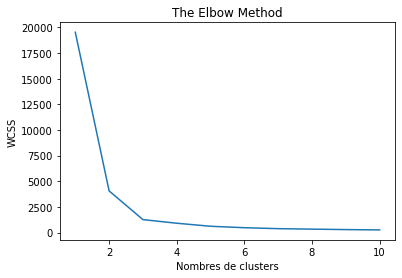

In [30]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(x_train)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Nombres de clusters')
plt.ylabel('WCSS')
plt.show()
    

In [31]:
print(type(x_train))

<class 'numpy.ndarray'>


In [32]:
kmeans = KMeans(n_clusters = 3)
kmeans.fit(x_train)
train_labels = kmeans.labels_
x_train_clstrs = x_train.copy()
x_train_clstrs_data = pd.DataFrame(x_train_clstrs)
x_train_clstrs_data['clusters'] = train_labels
x_train_clstrs_data

,0,1,clusters
0,-2.174653,0.236403,0
1,12.986193,0.047600,1
2,-2.225045,0.121728,0
3,-2.328552,0.111378,0
4,-2.117998,-0.070265,0
...,...,...,...
682,15.255687,-1.505086,1
683,-2.032191,-0.082635,0
684,-1.815704,-0.151651,0
685,-2.331394,0.112609,0


In [33]:
test_labels = kmeans.predict(x_test)
x_test_clstrs = x_test.copy()
x_test_clstrs_data = pd.DataFrame(x_test_clstrs)
x_test_clstrs_data['clusters'] = test_labels
x_test_clstrs_data

,0,1,clusters
0,-2.116937,-0.065372,0
1,15.965051,3.875415,2
2,-1.978490,0.200757,0
3,-1.260039,0.059521,0
4,0.829529,1.267898,0
...,...,...,...
224,-2.327016,0.111146,0
225,0.398889,0.717565,0
226,-2.064546,0.002547,0
227,12.316735,-6.132987,1


Text(0.5, 1.0, 'Category of Emissions')

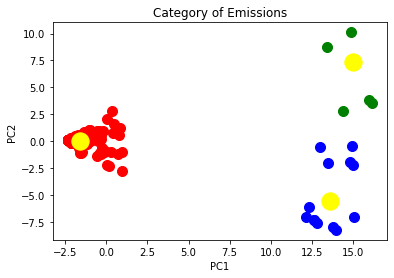

In [34]:
plt.scatter(x_test[test_labels == 0, 0],x_test[test_labels == 0, 1],s = 100, c ='red', label ='cluster1')
plt.scatter(x_test[test_labels == 1, 0],x_test[test_labels == 1, 1],s = 100, c ='blue', label = 'cluster2')
plt.scatter(x_test[test_labels == 2, 0],x_test[test_labels == 2, 1],s = 100, c ='green', label ='cluster3')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],s = 300, c = 'yellow', label ='Centroids')
plt.xlabel('PC1'),
plt.ylabel('PC2')
plt.title('Category of Emissions')



In [35]:
#x2 = x_test_clstrs_data.iloc[:,:-1].values
#y2 = x_test_clstrs_data.iloc[:,-1].values

In [36]:
#print(x1)

In [37]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(x_train, y_train)

LogisticRegression()

In [38]:
y_pred1 = clf.predict(x_test)
print(np.concatenate((y_pred1.reshape(len(y_pred1),1),y_test.reshape(len(y_test),1)),1))

[[0 0]
 [2 2]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [2 2]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [2 2]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [2 2]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [2 2]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [2 2]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [2 2]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [2 2]
 [0 0]
 [0 0]
 [2 2]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]

In [39]:
from sklearn.metrics import confusion_matrix , accuracy_score
cm = confusion_matrix(y_test, y_pred1)
print("Confusion Matrix of Logistic Regression\n", cm)
score1 = accuracy_score(y_test, y_pred1)
print ("Score LR\n" , score1)

Confusion Matrix of Logistic Regression
 [[184   5   0]
 [  6  16   0]
 [  0   0  18]]
Score LR
 0.9519650655021834


In [40]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric ='minkowski', p = 2)
classifier.fit(x_train,y_train)

KNeighborsClassifier()

In [41]:
y_pred2 = classifier.predict(x_test)
print(np.concatenate((y_pred2.reshape(len(y_pred2),1),y_test.reshape(len(y_test),1)),1))

[[0 0]
 [2 2]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [2 2]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [2 2]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [2 2]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [2 2]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [2 2]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [2 2]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [2 2]
 [0 0]
 [0 0]
 [2 2]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]

In [42]:
from sklearn.metrics import confusion_matrix , accuracy_score
cm = confusion_matrix(y_test, y_pred2)
print("Confusion Matrix KNN\n", cm)
score2 = accuracy_score(y_test, y_pred2)
print ("Score KNN\n" , score2)

Confusion Matrix KNN
 [[187   2   0]
 [  2  20   0]
 [  0   0  18]]
Score KNN
 0.982532751091703


In [43]:
from sklearn.svm import SVC
clsf = SVC(kernel = 'rbf', random_state = 0)
clsf.fit(x_train,y_train)

SVC(random_state=0)

In [44]:
y_pred3 = clsf.predict(x_test)
print(np.concatenate((y_pred3.reshape(len(y_pred3),1),y_test.reshape(len(y_test),1)),1))

[[0 0]
 [2 2]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [2 2]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [2 2]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [2 2]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [2 2]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [2 2]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [2 2]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [2 2]
 [0 0]
 [0 0]
 [2 2]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]

In [45]:
from sklearn.metrics import confusion_matrix , accuracy_score
cm = confusion_matrix(y_test, y_pred3)
print("Confusion Matrix of SVM\n", cm)
score3 = accuracy_score(y_test, y_pred3)
print ("Score SVM\n" , score3)

Confusion Matrix of SVM
 [[186   3   0]
 [  5  17   0]
 [  0   0  18]]
Score SVM
 0.9650655021834061


In [46]:
from sklearn.ensemble import RandomForestClassifier
clsfr = RandomForestClassifier(n_estimators = 10 , criterion = 'entropy', random_state = 0)
clsfr.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [47]:
y_pred4 = clsf.predict(x_test)
print(np.concatenate((y_pred4.reshape(len(y_pred4),1),y_test.reshape(len(y_test),1)),1))

[[0 0]
 [2 2]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [2 2]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [2 2]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [2 2]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [2 2]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [2 2]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [2 2]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [2 2]
 [0 0]
 [0 0]
 [2 2]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]

In [48]:
from sklearn.metrics import confusion_matrix , accuracy_score, precision_score, recall_score
cm = confusion_matrix(y_test, y_pred4)
print("Confusion Matrix of RandomForest\n", cm)
score4 = accuracy_score(y_test, y_pred4)
print ("Score RFC\n" , score4)

Confusion Matrix of RandomForest
 [[186   3   0]
 [  5  17   0]
 [  0   0  18]]
Score RFC
 0.9650655021834061
